# qsm_implementation.ipynb
Author: Connacher Murphy

Implements models A and B. See documentation for a discussion of this implementation.

## 0. Libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import qsm_tools as qsmt
import qsm_solver_mA as qsmA
import qsm_solver_mB as qsmB

## 1. Calibration
We create the commuting flows matrix $\mathbf{\pi}$, where $\pi_{i n}$ denotes the share of workers living in neighborhood $i$ commuting to neighborhood $n$.

In [38]:
(  # calibrate() returns objects needed for models A and B
    pi,
    pi_cond,
    residents,
    workers,
    R_bar,
    wages,
    num_nbhd,
    far_southeast_indices,
    employment_core_indices,
    neighborhoods_shp,
    theta,
    alpha,
    beta,
) = qsmt.calibrate()

## 2. Counterfactual solver
Following the notation in the writeup, I let $i$ correspond to the first index and $n$ to the second.

### 2.i. Model A

In [39]:
# Unit test
# calc_Z should return all zeros if we guess the correct wage changes
# We can set all parameter proportional changes to 1 (no changes) and check
# that a vector of unchanged wages is an equilibrium
w_tilde = np.ones((1, num_nbhd))  # use the second index to follow tilde(w)_n notation
A_hat = np.ones((1, num_nbhd))
R_hat = np.ones((num_nbhd, 1))
kappa_hat = np.ones((num_nbhd, num_nbhd))

Z = qsmA.calc_Z(w_tilde, theta, alpha, pi, residents, workers, A_hat, kappa_hat, R_hat)

print(f"Maximum absolute value of Z_i: {abs(Z).max()}")
print(f"Z nan values: {np.sum(np.isnan(Z))}")

Maximum absolute value of Z_i: 1.1102230246251565e-16
Z nan values: 0


In [40]:
# Run the unit test again, using the solve_counterfactual() function
w_hat = qsmA.solve_counterfactual(
    num_nbhd, theta, alpha, pi, residents, workers, A_hat, kappa_hat, R_hat
)

print(f"Maximum absolute value of (w_hat - 1): {abs(w_hat - 1).max()}")
print(f"w_hat nan values: {np.sum(np.isnan(w_hat))}")

Step 0 error: 0.0
Maximum absolute value of (w_hat - 1): 0.0
w_hat nan values: 0


### 2.ii. Model B

In [41]:
# Unit test
# calc_Z should return all zeros if we guess the correct wage and rent changes
# We can set all parameter proportional changes to 1 (no changes) and check
# that a vector of unchanged wages and rents is an equilibrium
w_tilde = np.ones((1, num_nbhd))  # use the second index to follow tilde(w)_n notation
q_tilde = np.ones((num_nbhd, 1))
kappa_hat = np.ones((num_nbhd, num_nbhd))
B_hat = np.ones((num_nbhd, num_nbhd))
R_bar_hat = np.ones((1, 1))
H_hat = np.ones((num_nbhd, 1))
A_hat = np.ones((1, num_nbhd))

Z = qsmB.calc_Z(
    w_tilde,
    q_tilde,
    theta,
    alpha,
    beta,
    pi,
    workers,
    R_bar,
    A_hat,
    kappa_hat,
    B_hat,
    R_bar_hat,
)

q_tilde_guess = qsmB.calc_q_hat(
    theta,
    alpha,
    pi,
    wages,
    w_tilde,
    q_tilde,
    kappa_hat,
    B_hat,
    R_bar_hat,
    H_hat,
)

print(f"Maximum absolute value of Z_i: {abs(Z).max()}")
print(f"Maximum absolute difference in rents: {abs(q_tilde - q_tilde_guess).max()}")

print(f"Z nan values: {np.sum(np.isnan(Z))}")
print(f"q_tilde nan values: {np.sum(np.isnan(q_tilde_guess))}")

Maximum absolute value of Z_i: 7.771561172376096e-16
Maximum absolute difference in rents: 5.551115123125783e-16
Z nan values: 0
q_tilde nan values: 0


In [42]:
# Run the unit test again, using the solve_counterfactual() function
w_hat, q_hat = qsmB.solve_counterfactual(
    num_nbhd,
    theta,
    alpha,
    beta,
    pi,
    wages,
    workers,
    R_bar,
    A_hat,
    kappa_hat,
    B_hat,
    R_bar_hat,
    H_hat,
)

print(f"Maximum absolute value of w_hat - 1: {abs(w_hat - 1).max()}")
print(f"Maximum absolute value of q_tilde - 1: {abs(q_hat - 1).max()}")

print(f"w_hat nan values: {np.sum(np.isnan(w_hat))}")
print(f"q_hat nan values: {np.sum(np.isnan(q_hat))}")

Step 0 error: 0.0
Maximum absolute value of w_hat - 1: 1.1102230246251565e-16
Maximum absolute value of q_tilde - 1: 0.0
w_hat nan values: 0
q_hat nan values: 0


## 3. Counterfactual exercises

### 3.i. Local productivity shock

In [43]:
A_hat[:, far_southeast_indices] = 1.05  # increase productivity by 5% in far southeast
w_hat = qsmA.solve_counterfactual(
    num_nbhd, theta, alpha, pi_cond, residents, workers, A_hat, kappa_hat, R_hat,
)

productivity_shock_mA_shp = qsmA.summarize_counterfactual(
    num_nbhd, neighborhoods_shp, w_hat, theta, pi_cond, kappa_hat, R_hat, residents, workers
)

Step 0 error: 0.1593378027
Step 1 error: 0.0088792653
Step 2 error: 0.0018112551
Step 3 error: 0.0009901398
Step 4 error: 0.0006695235
Step 5 error: 0.0004647707
Step 6 error: 0.0003237801
Step 7 error: 0.0002257183
Step 8 error: 0.0001573723
Step 9 error: 0.0001097236
Step 10 error: 7.65035e-05
Step 11 error: 5.3342e-05
Step 12 error: 3.71931e-05
Step 13 error: 2.59333e-05
Step 14 error: 1.80824e-05
Step 15 error: 1.26083e-05
Step 16 error: 8.7914e-06
Step 17 error: 6.13e-06
Step 18 error: 4.2743e-06
Step 19 error: 2.9803e-06
Step 20 error: 2.0781e-06
Step 21 error: 1.449e-06
Step 22 error: 1.0104e-06
Step 23 error: 7.045e-07
Step 24 error: 4.912e-07
Step 25 error: 3.425e-07
Step 26 error: 2.388e-07
Step 27 error: 1.665e-07
Step 28 error: 1.161e-07
Step 29 error: 8.1e-08
Step 30 error: 5.65e-08
Step 31 error: 3.94e-08
Step 32 error: 2.74e-08
Step 33 error: 1.91e-08
Step 34 error: 1.33e-08
Step 35 error: 9.3e-09
Step 36 error: 6.5e-09
Step 37 error: 4.5e-09
Step 38 error: 3.2e-09
Step 

In [44]:
w_hat, q_hat = qsmB.solve_counterfactual(
    num_nbhd,
    theta,
    alpha,
    beta,
    pi,
    wages,
    workers,
    R_bar,
    A_hat,
    kappa_hat,
    B_hat,
    R_bar_hat,
    H_hat,
)

productivity_shock_mB_shp = qsmB.summarize_counterfactual(
    num_nbhd, neighborhoods_shp, w_hat, q_hat, theta, alpha, pi, workers, residents, R_bar, kappa_hat, B_hat, R_bar_hat
)

Step 0 error: 0.1297263219
Step 1 error: 0.0037569667
Step 2 error: 0.0040895422
Step 3 error: 0.002884069
Step 4 error: 0.0020593541
Step 5 error: 0.0014733334
Step 6 error: 0.0010560053
Step 7 error: 0.0007581456
Step 8 error: 0.0005451486
Step 9 error: 0.0003925749
Step 10 error: 0.0002831097
Step 11 error: 0.0002044545
Step 12 error: 0.0001478553
Step 13 error: 0.0001070697
Step 14 error: 7.76385e-05
Step 15 error: 5.63715e-05
Step 16 error: 4.09833e-05
Step 17 error: 2.98339e-05
Step 18 error: 2.17449e-05
Step 19 error: 1.58687e-05
Step 20 error: 1.15944e-05
Step 21 error: 8.4814e-06
Step 22 error: 6.2113e-06
Step 23 error: 4.554e-06
Step 24 error: 3.3425e-06
Step 25 error: 2.4558e-06
Step 26 error: 1.8063e-06
Step 27 error: 1.3298e-06
Step 28 error: 9.799e-07
Step 29 error: 7.228e-07
Step 30 error: 5.336e-07
Step 31 error: 3.943e-07
Step 32 error: 2.915e-07
Step 33 error: 2.158e-07
Step 34 error: 1.598e-07
Step 35 error: 1.184e-07
Step 36 error: 8.78e-08
Step 37 error: 6.52e-08
S

### 3.ii. Employment core transportation shock

In [45]:
# Reset A_hat
A_hat = np.ones((1, num_nbhd))

# Reduce travel costs from far Southeast to employment core by 5%
kappa_hat[far_southeast_indices.reshape(-1, 1), employment_core_indices] = 0.95

w_hat = qsmA.solve_counterfactual(
    num_nbhd, theta, alpha, pi_cond, residents, workers, A_hat, kappa_hat, R_hat
)
transport_shock_mA_shp = qsmA.summarize_counterfactual(
    num_nbhd, neighborhoods_shp, w_hat, theta, pi_cond, kappa_hat, R_hat, residents, workers
)

Step 0 error: 0.1199607664
Step 1 error: 0.0165669691
Step 2 error: 0.0020834493
Step 3 error: 0.0002654266
Step 4 error: 3.8517e-05
Step 5 error: 8.5822e-06
Step 6 error: 3.6692e-06
Step 7 error: 2.26e-06
Step 8 error: 1.5365e-06
Step 9 error: 1.0658e-06
Step 10 error: 7.422e-07
Step 11 error: 5.172e-07
Step 12 error: 3.604e-07
Step 13 error: 2.512e-07
Step 14 error: 1.751e-07
Step 15 error: 1.22e-07
Step 16 error: 8.51e-08
Step 17 error: 5.93e-08
Step 18 error: 4.13e-08
Step 19 error: 2.88e-08
Step 20 error: 2.01e-08
Step 21 error: 1.4e-08
Step 22 error: 9.8e-09
Step 23 error: 6.8e-09
Step 24 error: 4.7e-09
Step 25 error: 3.3e-09
Step 26 error: 2.3e-09
Step 27 error: 1.6e-09
Step 28 error: 1.1e-09
Step 29 error: 8e-10
Step 30 error: 5e-10
Step 31 error: 4e-10
Step 32 error: 3e-10
Step 33 error: 2e-10
Step 34 error: 1e-10
Step 35 error: 1e-10


In [46]:
w_hat, q_hat = qsmB.solve_counterfactual(
    num_nbhd,
    theta,
    alpha,
    beta,
    pi,
    wages,
    workers,
    R_bar,
    A_hat,
    kappa_hat,
    B_hat,
    R_bar_hat,
    H_hat,
)

transport_shock_mB_shp = qsmB.summarize_counterfactual(
    num_nbhd, neighborhoods_shp, w_hat, q_hat, theta, alpha, pi, workers, residents, R_bar, kappa_hat, B_hat, R_bar_hat
)

Step 0 error: 0.0145855788
Step 1 error: 0.0322813398
Step 2 error: 0.0222173961
Step 3 error: 0.0148834251
Step 4 error: 0.0100664002
Step 5 error: 0.0068699056
Step 6 error: 0.0047184658
Step 7 error: 0.0032551287
Step 8 error: 0.0022525013
Step 9 error: 0.001562038
Step 10 error: 0.0010848634
Step 11 error: 0.0007542737
Step 12 error: 0.0005248384
Step 13 error: 0.0003654076
Step 14 error: 0.0002545219
Step 15 error: 0.0001773487
Step 16 error: 0.0001236114
Step 17 error: 8.61785e-05
Step 18 error: 6.00949e-05
Step 19 error: 4.19147e-05
Step 20 error: 2.92403e-05
Step 21 error: 2.04024e-05
Step 22 error: 1.42386e-05
Step 23 error: 9.9388e-06
Step 24 error: 6.9389e-06
Step 25 error: 4.8454e-06
Step 26 error: 3.3842e-06
Step 27 error: 2.3642e-06
Step 28 error: 1.652e-06
Step 29 error: 1.1545e-06
Step 30 error: 8.071e-07
Step 31 error: 5.643e-07
Step 32 error: 3.947e-07
Step 33 error: 2.761e-07
Step 34 error: 1.932e-07
Step 35 error: 1.352e-07
Step 36 error: 9.47e-08
Step 37 error: 6.6

In [47]:
# Shapefile lists
shp_list = [
    productivity_shock_mA_shp,
    productivity_shock_mB_shp,
    transport_shock_mA_shp,
    transport_shock_mB_shp,
]

shp_list_exclude = [  # exclude far southeast
    shp[shp["far_southeast"] == 0] for shp in shp_list
]

shp_list_focus = [  # only far southeast
    shp[shp["far_southeast"] == 1] for shp in shp_list
]


## 4. Summary

## 4.i. Shock locations

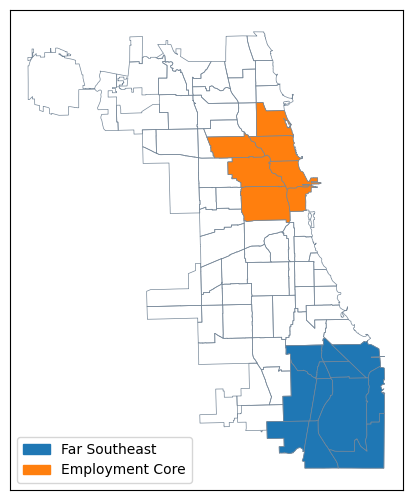

In [48]:
fig, ax = plt.subplots()

neighborhoods_shp.plot(
    facecolor="none", edgecolor="lightslategray", linewidth=0.5, ax=ax
)

neighborhoods_shp[neighborhoods_shp["far_southeast"] == 1].plot(
    label="Far Southeast",
    legend=True,
    facecolor="tab:blue",
    edgecolor="lightslategray",
    linewidth=0.5,
    ax=ax,
)

neighborhoods_shp[neighborhoods_shp["employment_core"] == 1].plot(
    label="Employment Core",
    legend=True,
    facecolor="tab:orange",
    edgecolor="lightslategray",
    linewidth=0.5,
    ax=ax,
)

# Create legend patches
patch1 = mpatches.Patch(color="tab:blue", label="Far Southeast")
patch2 = mpatches.Patch(color="tab:orange", label="Employment Core")

# Add legend to the plot
plt.legend(handles=[patch1, patch2], loc="lower left")

# Final styling
plt.xticks([])
plt.yticks([])
plt.tight_layout(pad=0)
plt.savefig("../out/shock_map.png", bbox_inches="tight")
plt.show()

### 4.ii. Wages

In [49]:
panel_titles = [
    "Panel A. Productivity Shock (Model A)",
    "Panel B. Productivity Shock (Model B)",
    "Panel C. Transport Cost Shock (Model A)",
    "Panel D. Transport Cost Shock (Model B)",
]
panel_titles_mB = [
    "Panel A. Productivity Shock (Model B)",
    "Panel B. Transport Cost Shock (Model B)",
]
panel_titles_mA = [
    "Panel A. Productivity Shock (Model A)",
    "Panel B. Transport Cost Shock (Model A)",
]

filenames = ["prod_mA", "prod_mB", "trans_mA", "trans_mB"]
filenames_exclude = [f"{filename}_exclude" for filename in filenames]

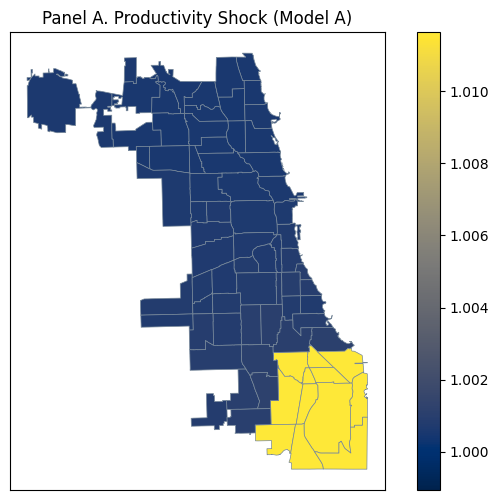

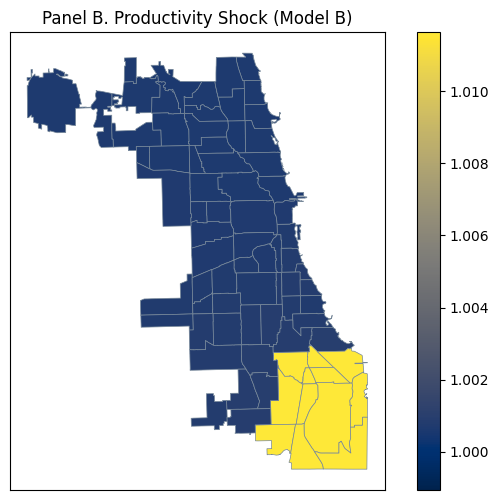

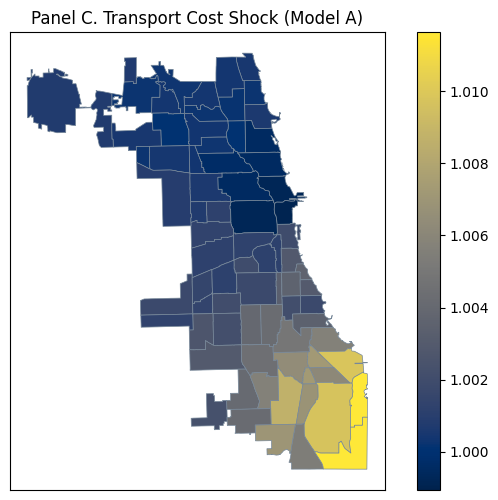

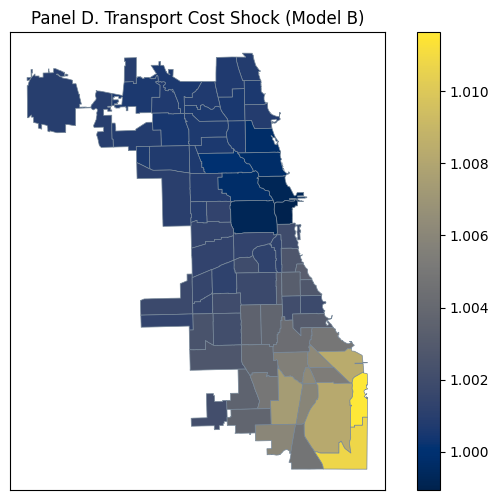

In [50]:
qsmt.compare_maps(shp_list, "w_hat", panel_titles, filenames)

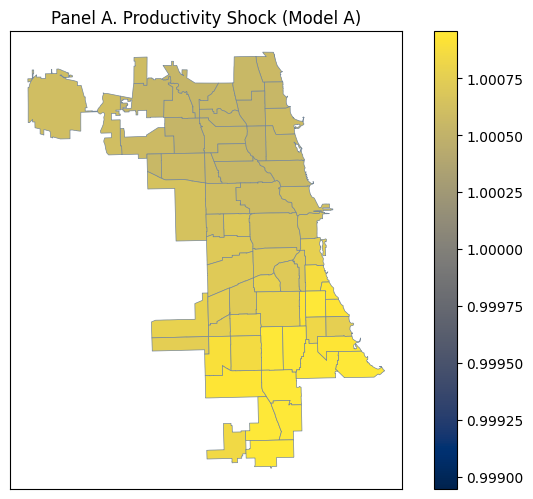

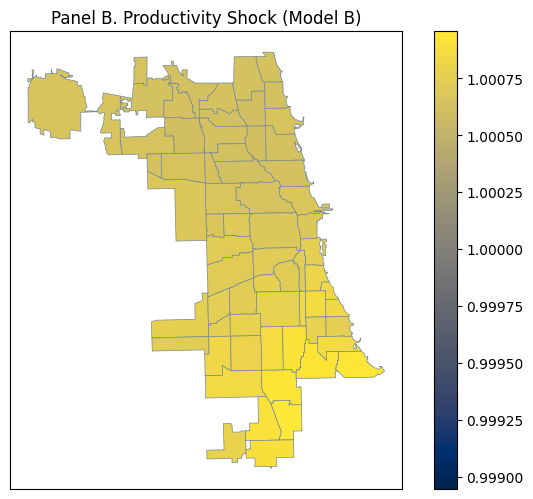

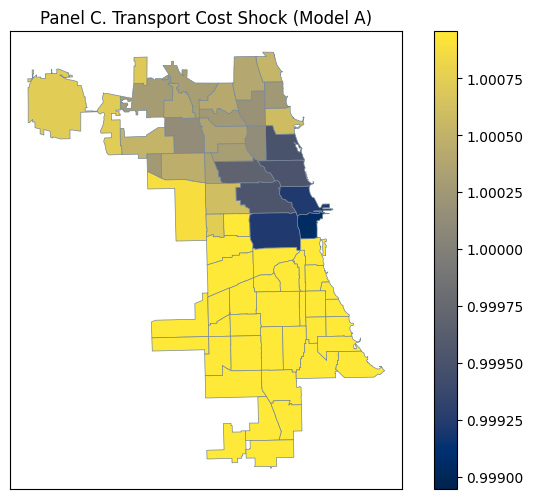

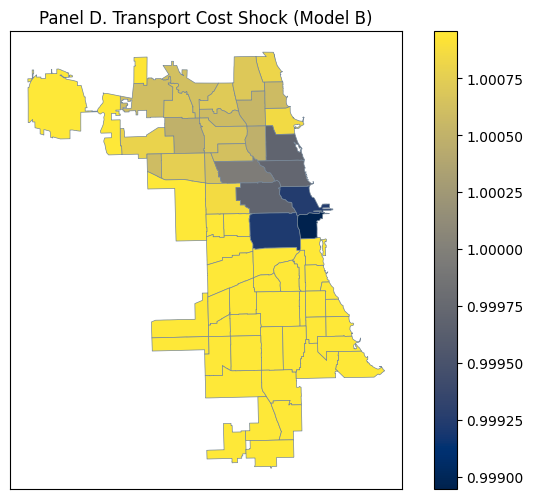

In [51]:
qsmt.compare_maps(shp_list_exclude, "w_hat", panel_titles, filenames_exclude)

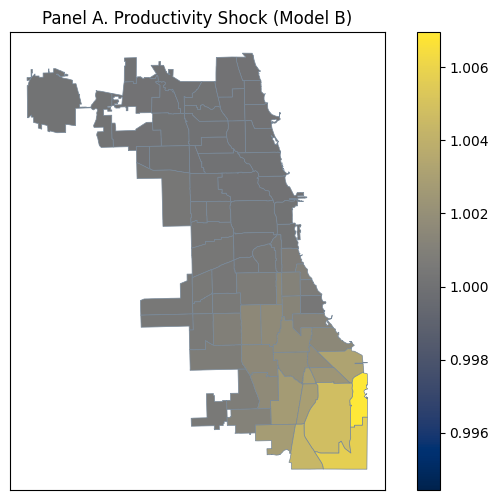

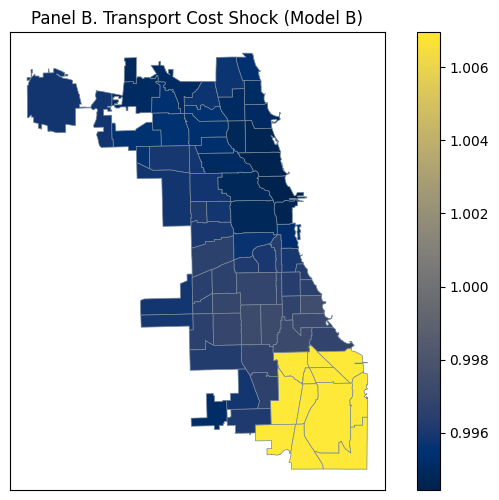

In [52]:
qsmt.compare_maps([shp_list[1], shp_list[3]], "q_hat", panel_titles_mB, [filenames[1], filenames[3]])

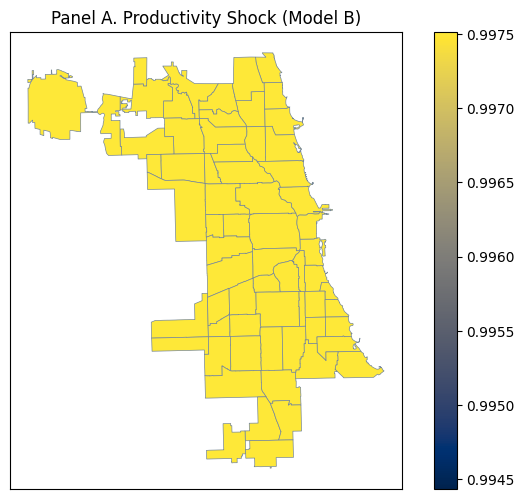

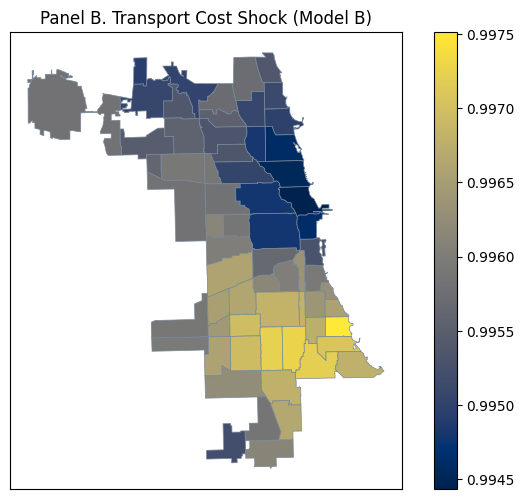

In [53]:
qsmt.compare_maps([shp_list_exclude[1], shp_list_exclude[3]], "q_hat", panel_titles_mB, [filenames_exclude[1], filenames_exclude[3]])

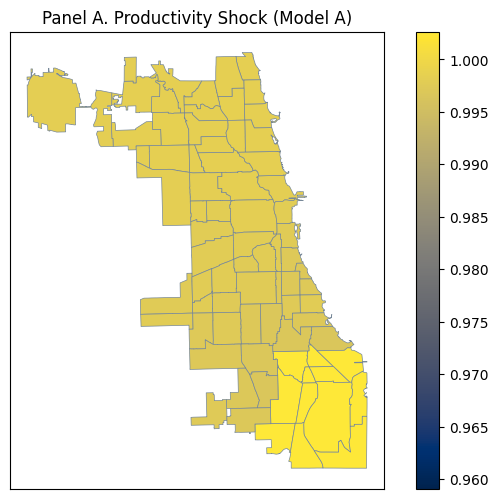

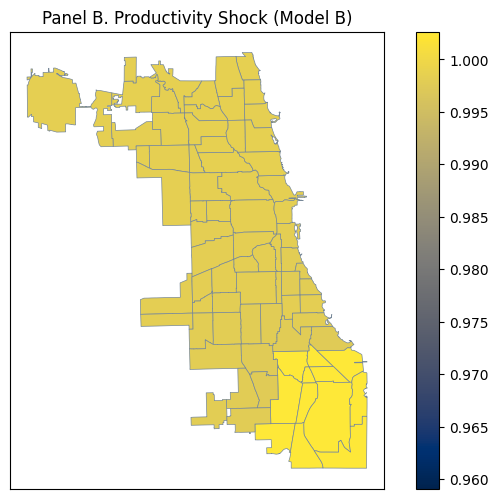

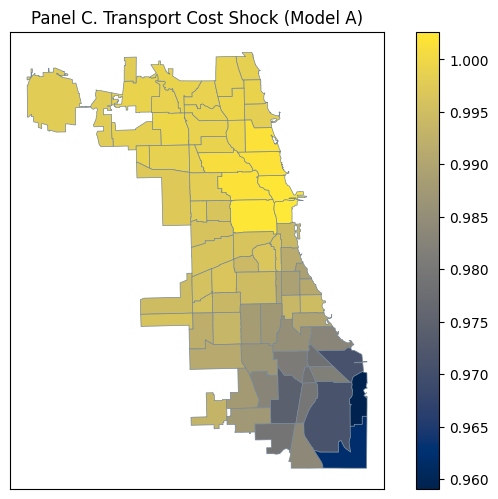

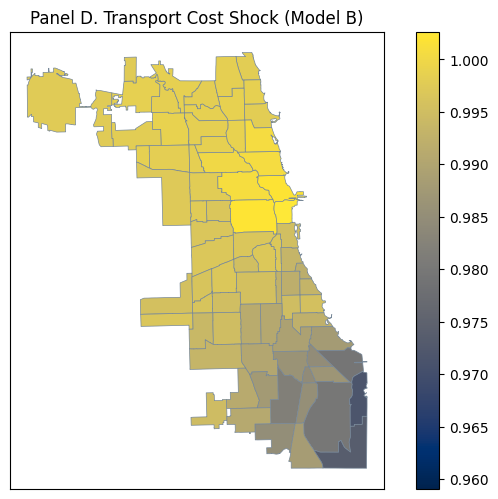

In [54]:
qsmt.compare_maps(shp_list, "L_hat", panel_titles, filenames)

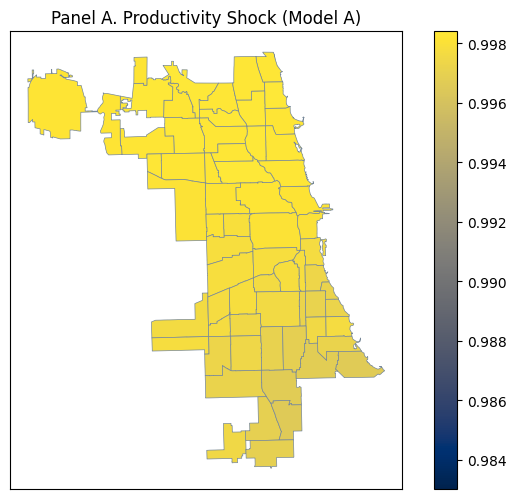

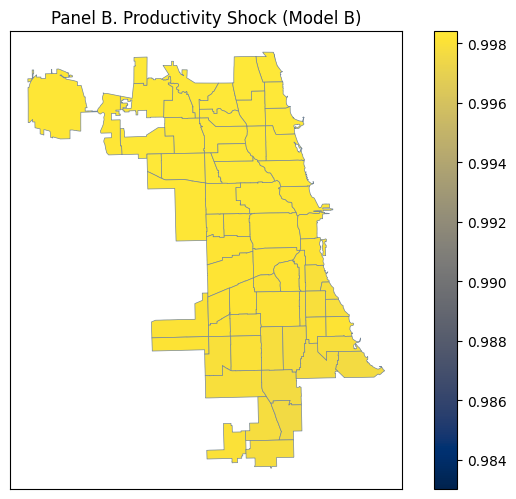

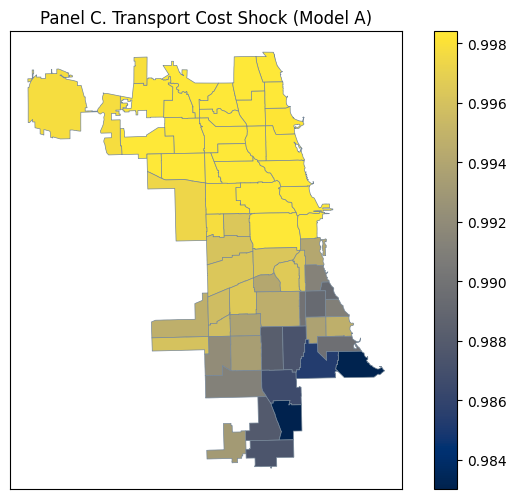

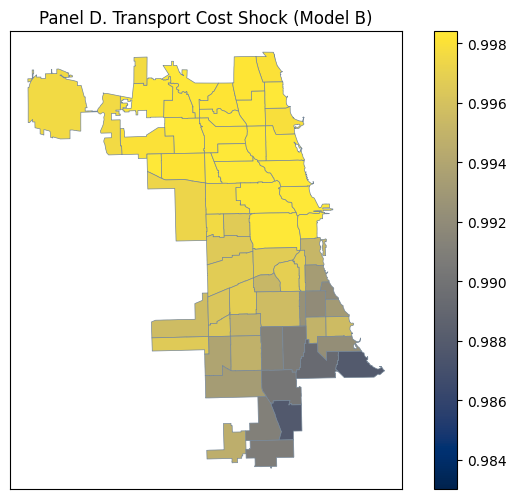

In [55]:
qsmt.compare_maps(shp_list_exclude, "L_hat", panel_titles, filenames_exclude)

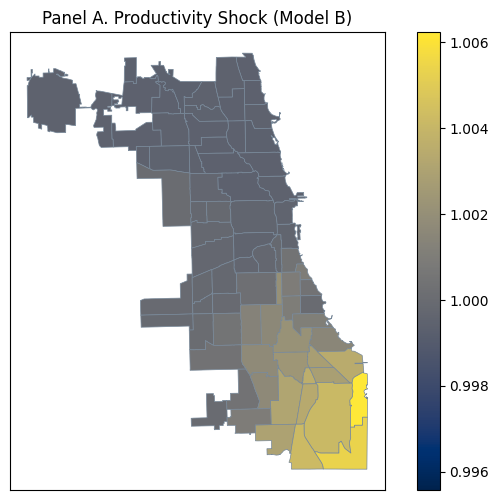

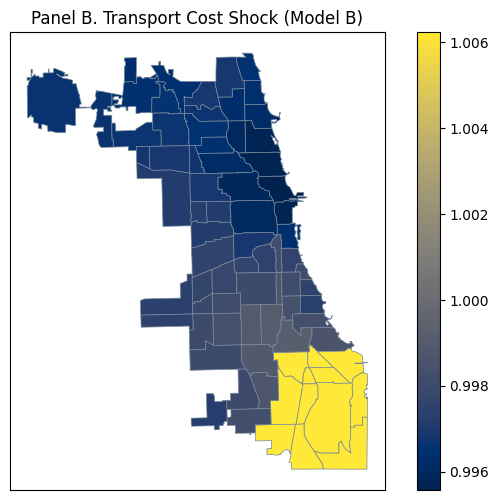

In [56]:
qsmt.compare_maps([shp_list[1], shp_list[3]], "R_hat", panel_titles_mB, [filenames[1], filenames[3]])

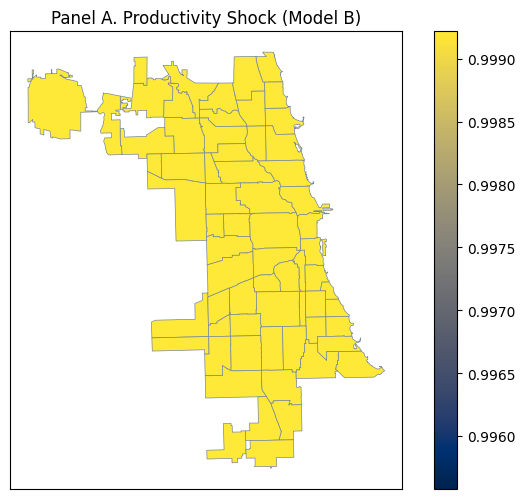

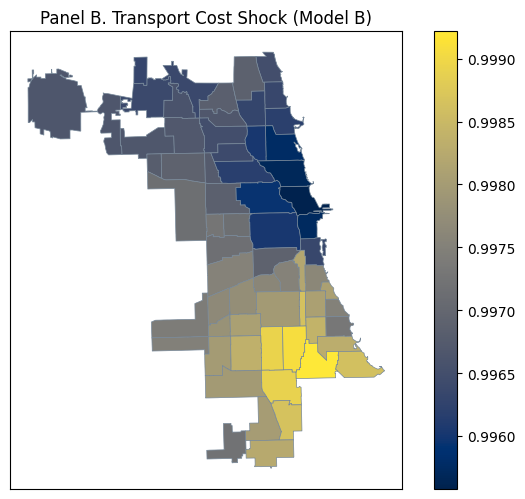

In [57]:
qsmt.compare_maps([shp_list_exclude[1], shp_list_exclude[3]], "R_hat", panel_titles_mB, [filenames_exclude[1], filenames_exclude[3]])

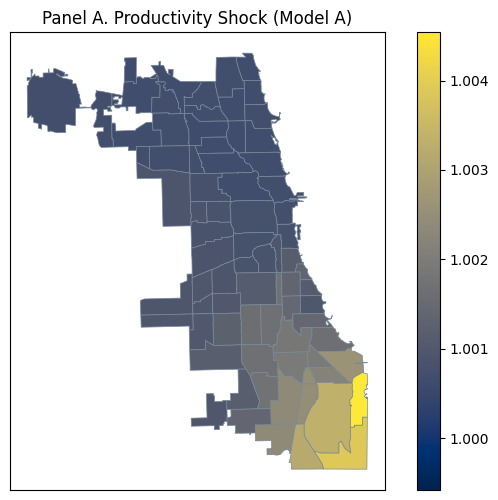

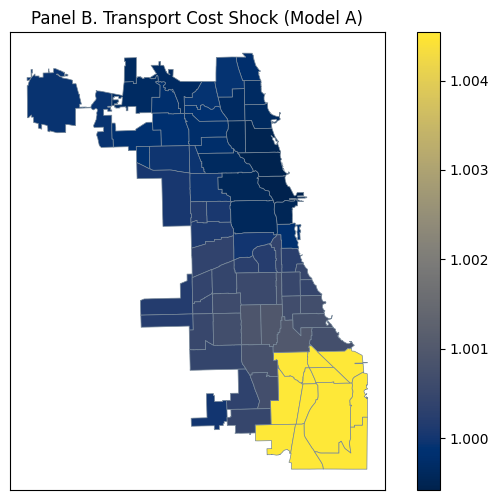

In [58]:
qsmt.compare_maps([shp_list[0], shp_list[2]], "U_hat", panel_titles_mA, [filenames[0], filenames[2]])

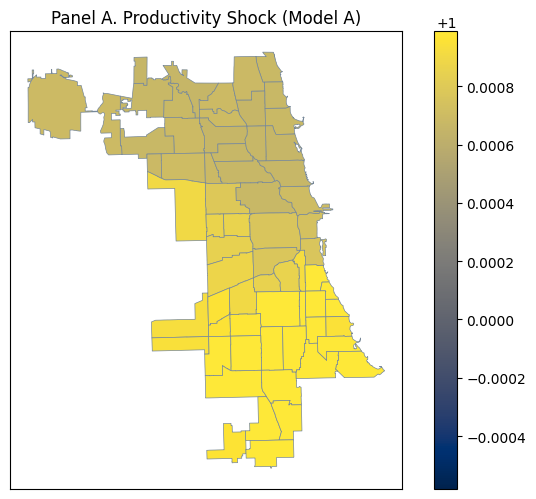

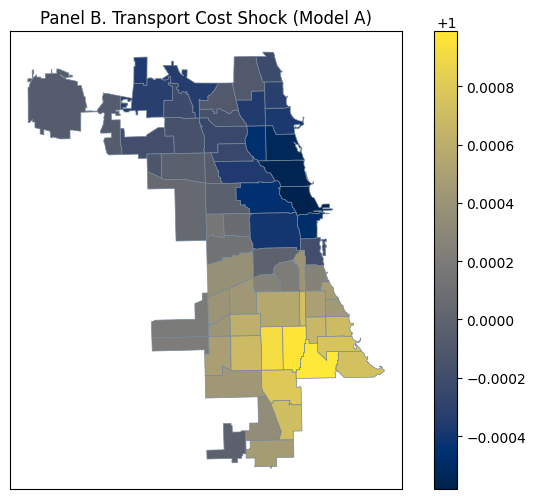

In [59]:
qsmt.compare_maps([shp_list_exclude[0], shp_list_exclude[2]], "U_hat", panel_titles_mA, [filenames_exclude[0], filenames_exclude[2]])

In [60]:
print(productivity_shock_mB_shp["U_hat"].min())
print(productivity_shock_mB_shp["U_hat"].max())
print(transport_shock_mB_shp["U_hat"].min())
print(transport_shock_mB_shp["U_hat"].max())

1.000783025244706
1.000783025244706
1.0018882902521573
1.0018882902521573
